In [1]:
import matplotlib.pyplot as plt
import scipy.ndimage
import numpy as np
import matplotlib.animation as animation
from matplotlib.image import AxesImage
from IPython.display import HTML

%matplotlib inline

plt.rcParams['image.cmap'] = 'gray'

In [2]:
def rgb(img):
    img = np.copy(img).astype(np.float)
    img[:,:,0] -= img[:,:,0].min()
    img[:,:,0] /= img[:,:,0].max()
    img[:,:,0] *= 255
    img[:,:,1] -= img[:,:,1].min()
    img[:,:,1] /= img[:,:,1].max()
    img[:,:,1] *= 255
    img[:,:,2] -= img[:,:,2].min()
    img[:,:,2] /= img[:,:,2].max()
    img[:,:,2] *= 255
    return img.astype(np.uint8)

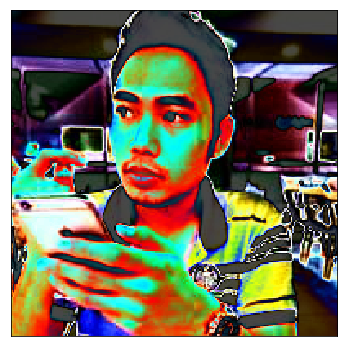

In [3]:
img = plt.imread('me2.jpg').astype(np.float)

def sinc_filter(img):
    img_filtered = np.copy(img)

    img_filtered[:,:,0] -= img_filtered[:,:,0].min()
    img_filtered[:,:,0] /= img_filtered[:,:,0].max()
    img_filtered[:,:,0] -= 0.5
    img_filtered[:,:,0] *= 5
    img_filtered[:,:,1] -= img_filtered[:,:,1].min()
    img_filtered[:,:,1] /= img_filtered[:,:,1].max()
    img_filtered[:,:,1] -= 0.5
    img_filtered[:,:,1] *= 5
    img_filtered[:,:,2] -= img_filtered[:,:,2].min()
    img_filtered[:,:,2] /= img_filtered[:,:,2].max()
    img_filtered[:,:,2] -= 0.5
    img_filtered[:,:,2] *= 5

    img_filtered[:,:,0] = np.sinc(img_filtered[:,:,0])
    img_filtered[:,:,1] = np.sinc(img_filtered[:,:,1])
    img_filtered[:,:,2] = np.sinc(img_filtered[:,:,2])
    
    return img_filtered

img_filtered = sinc_filter(img)

fig = plt.figure(figsize=(6,6))
_ = plt.imshow(rgb(img_filtered))
_.axes.get_xaxis().set_visible(False)
_.axes.get_yaxis().set_visible(False)

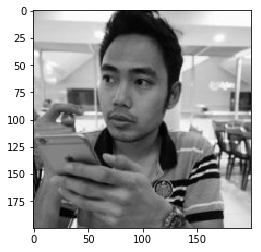

In [4]:
img = np.average(plt.imread('me2.jpg'), axis=2, weights=[.2126, .7152, .0722])
img -= img.min()
img /= img.max()
_ = plt.imshow(img)

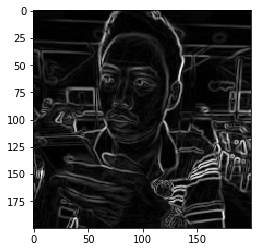

In [5]:
f = np.array([[3, 0, -3],
    [10, 0, -10],
    [3, 0, -3]])
g = f.T
img_f = scipy.ndimage.convolve(img, f, mode='reflect')
img_g = scipy.ndimage.convolve(img, g, mode='reflect')
img_h = np.sqrt(np.square(img_g) + np.square(img_f))
_ = plt.imshow(img_h)

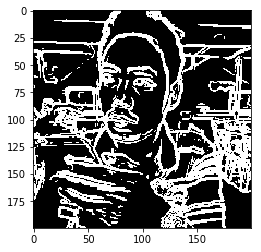

In [6]:
img_m = np.copy(img_h)
img_m -= img_m.min()
img_m /= img_m.max()
img_m_mean = img_m.mean()
img_m[img_m < img_m_mean] = 0.
img_m[img_m != 0.] = 1.
_ = plt.imshow(img_m)

In [7]:
i = 0
def animate_images(images):
    fig = plt.figure(figsize=(8,8))
    i = 0
    im = plt.imshow(images[0], animated=True)
    def animate(*args):
        global i, images
        i += 1
        if i == len(images):
            i = 0
        im.set_array(rgb(images[i]))
        return im,

    anim = animation.FuncAnimation(fig, animate, interval=200, frames=len(images))
    return HTML(anim.to_html5_video())

In [8]:
img = plt.imread('me2.jpg').astype(np.float)

In [9]:
ns = np.arange(21, 1, step=-2)

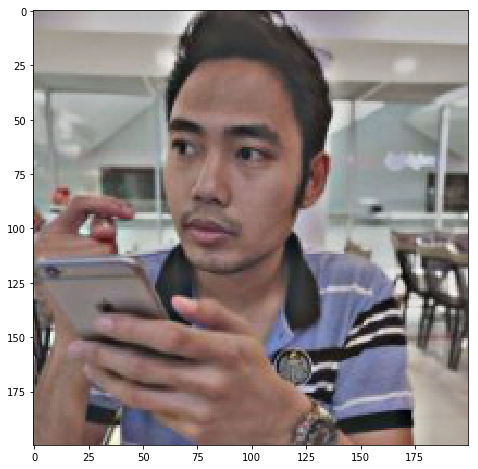

In [10]:
images = [rgb(img)]

def sharpen(img, N=3):
    img = np.copy(img)
    s = np.ones((N, N, 1))
    s /= -np.square(N)
    midpoint = int(np.floor(N / 2))
    s[midpoint, midpoint] += 1. - s.sum()
#     plt.imshow(s.reshape(N, N))
    img_s = scipy.ndimage.convolve(img, s, mode='reflect')
    return img_s

for n in ns:
    img_s = sharpen(img, n)
    images.append(img_s)

animate_images(images)

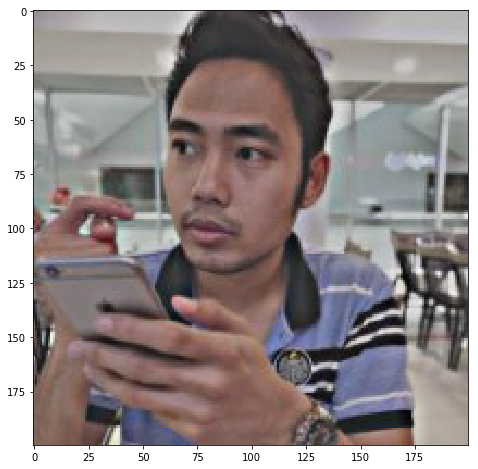

In [11]:
images = [rgb(img)]

def sharpen_variant_x(img, N=3):
    img = np.copy(img)
    s = np.ones((N, N, 1))
    s /= -np.square(N)
    midpoint = int(np.floor(N / 2))
    midpoint_around = 1. / np.square(N)
    s[midpoint-1, midpoint-1] =  midpoint_around
    s[midpoint-1, midpoint+1] =  midpoint_around
    s[midpoint+1, midpoint-1] =  midpoint_around
    s[midpoint+1, midpoint+1] =  midpoint_around
    s[midpoint, midpoint] += 1. - s.sum()
#     plt.imshow(s.reshape(N, N))
    img_s = scipy.ndimage.convolve(img, s, mode='reflect')
    return img_s

for n in ns:
    img_s = sharpen_variant_x(img, n)
    images.append(img_s)

animate_images(images)

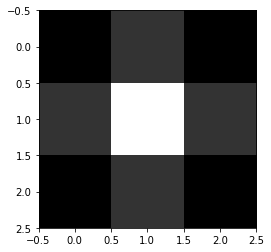

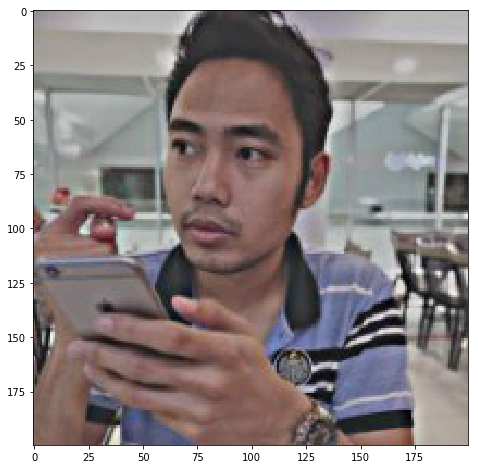

In [12]:
images = [rgb(img)]

def sharpen_variant_cross(img, N=3):
    img = np.copy(img)
    s = np.ones((N, N, 1))
    s /= -np.square(N)
    midpoint = int(np.floor(N / 2))
    
    midpoint_around = 1. / np.square(N)
    s[midpoint-1, midpoint] =  midpoint_around
    s[midpoint+1, midpoint] =  midpoint_around
    s[midpoint, midpoint-1] =  midpoint_around
    s[midpoint, midpoint+1] =  midpoint_around
    
    s[midpoint, midpoint] += 1. - s.sum()
    
    plt.imshow(s.reshape(N, N))
    
    img_s = scipy.ndimage.convolve(img, s, mode='reflect')
    return img_s

for n in ns:
    img_s = sharpen_variant_cross(img, n)
    images.append(img_s)

animate_images(images)

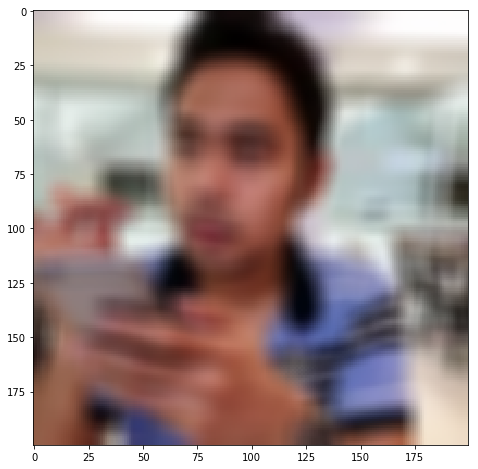

In [13]:
images = [rgb(img)]

def build_checkerboard(w, h) :
    re = np.r_[w * [0, 1]]
    ro = np.r_[w * [1, 0]]
    return np.row_stack(h * (re, ro))[:w,:h].astype(np.float)

def checkered_kernel(img, N=3):
    img = np.copy(img)
    
    s = build_checkerboard(N, N).reshape(N, N, 1)
    s /= s.sum()
    
    img_s = scipy.ndimage.convolve(img, s, mode='reflect')
    return img_s

for n in ns:
    img_s = checkered_kernel(img, n)
    images.append(img_s)

animate_images(images)

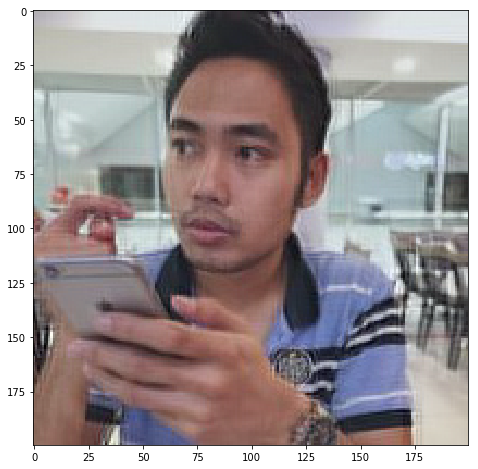

In [14]:
images = [rgb(img)]

def spiral_kernel(img, N=3):
    img = np.copy(img)
    
    s = np.zeros((N, N, 1))
    midpoint = int(np.floor(N / 2))
    
    for i in range(int((N - 1)/2)):
        if i % 2 == 1:
            s[i] = N
            s[-(i + 1)] = -N
            s[:,i] = N
            s[:,-(i + 1)] = -N
        else:
            s[i] = -N
            s[-(i + 1)] = N
            s[:,i] = -N
            s[:,-(i + 1)] = N
    
    s[midpoint, midpoint] = N * N
    s /= s.sum()
    
    img_s = scipy.ndimage.convolve(img, s, mode='reflect')
    return img_s

for n in ns:
    img_s = spiral_kernel(img, n)
    images.append(img_s)

animate_images(images)

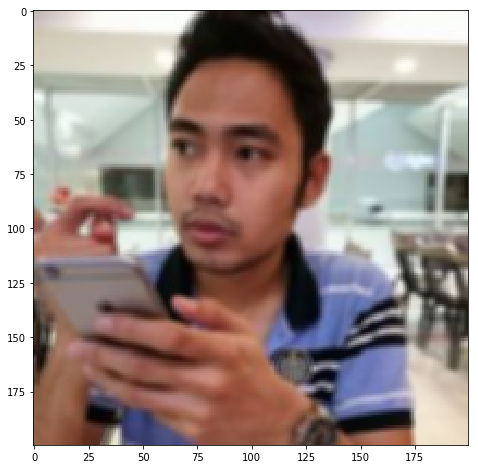

In [15]:
images = []

def box_kernel(img, N=3):
    img = np.copy(img)
    
    s = np.zeros((N, N, 1))
    s[0] = 1.
    s[-1] = 1.
    s[:,0] = 1.
    s[:,-1] = 1.
    midpoint = int(np.floor(N / 2))
    s /= s.sum()
    
#     plt.imshow(s.reshape(N, N))
    
    img_s = scipy.ndimage.convolve(img, s, mode='reflect')
    return img_s

for n in ns:
    img_s = box_kernel(img, n)
    images.append(img_s)

animate_images(images)

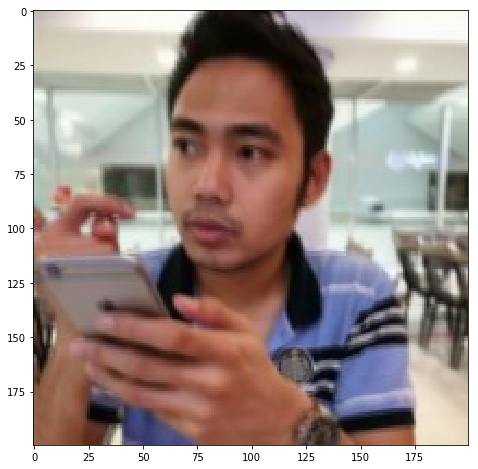

In [16]:
images = [rgb(img)]

def sprinkle_kernel(img, N=3):
    img = np.copy(img)
    s = np.random.choice(2, size=(N, N, 1)).astype(np.float)
    s /= s.sum()
    
    img_s = scipy.ndimage.convolve(img, s, mode='reflect')
    return img_s

for n in ns:
    img_s = sprinkle_kernel(img, n)
    images.append(img_s)

animate_images(images)

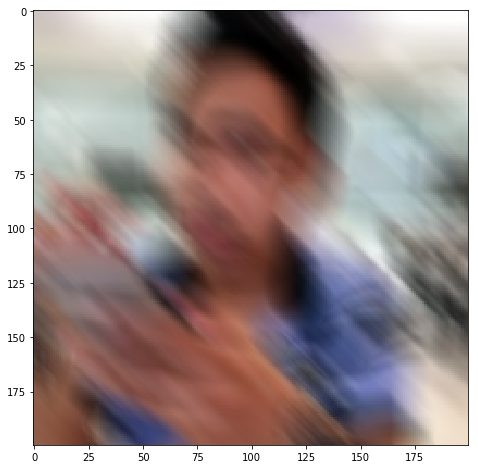

In [17]:
images = [rgb(img)]

def diagonal_kernel(img, N=3):
    img = np.copy(img)
    s = np.identity(N).reshape(N, N, 1)
    s /= s.sum()
    
    img_s = scipy.ndimage.convolve(img, s, mode='reflect')
    return img_s

for n in ns:
    img_s = diagonal_kernel(img, n)
    images.append(img_s)

animate_images(images)

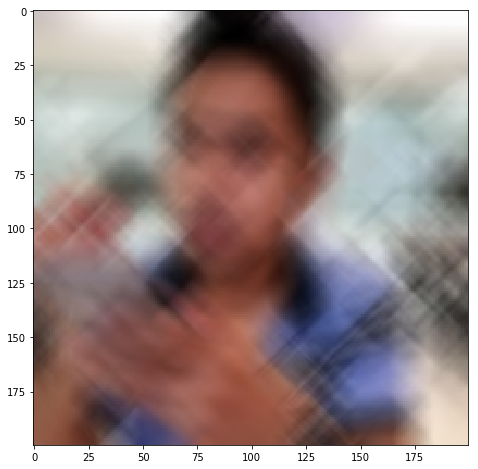

In [18]:
images = [rgb(img)]

def x_kernel(img, N=3):
    img = np.copy(img)
    s = (np.identity(N) + np.flip(np.identity(N), axis=0)).reshape(N, N, 1)
    s /= s.sum()
    
    img_s = scipy.ndimage.convolve(img, s, mode='reflect')
    return img_s

for n in ns:
    img_s = x_kernel(img, n)
    images.append(img_s)

animate_images(images)

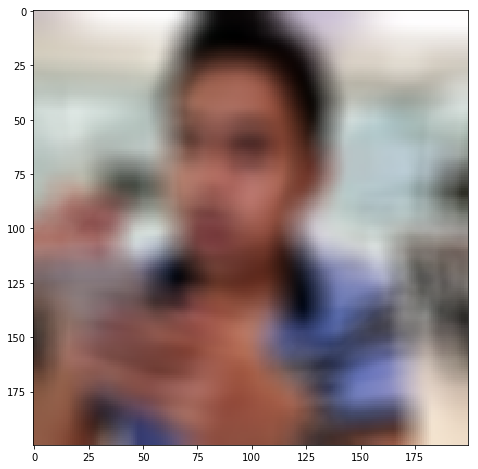

In [19]:
images = [rgb(img)]

def inverse_x_kernel(img, N=3):
    img = np.copy(img)
    s = np.ones((N, N, 1))
    s -= (np.identity(N) + np.flip(np.identity(N), axis=0)).reshape(N, N, 1)
    s /= s.sum()
    
    img_s = scipy.ndimage.convolve(img, s, mode='reflect')
    return img_s

for n in ns:
    img_s = inverse_x_kernel(img, n)
    images.append(img_s)

animate_images(images)

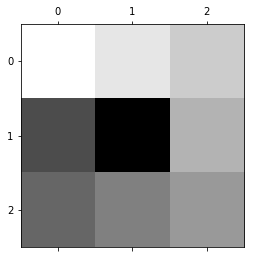

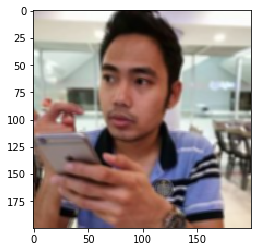

In [20]:
def fading_spiral_kernel(img):
    img = np.copy(img)
    s = np.array([[1.,0.9,0.8],
                 [0.3,0.,0.7],
                 [0.4,0.5,0.6]]).reshape(3,3,1)
    s /= s.sum()
    plt.matshow(s.reshape(3,3))
    plt.show()
    
    img_s = scipy.ndimage.convolve(img, s, mode='reflect')
    return img_s

_ = plt.imshow(rgb(fading_spiral_kernel(img)))

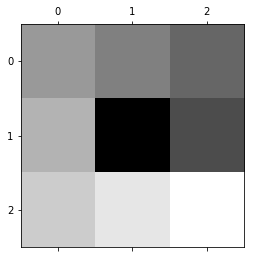

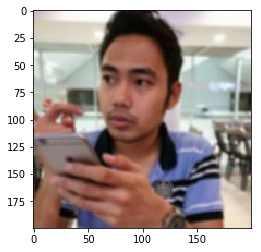

In [21]:
def fading_spiral_kernel_counter(img):
    img = np.copy(img)
    s = np.array([[1.,0.9,0.8],
                 [0.3,0.,0.7],
                 [0.4,0.5,0.6]]).reshape(3,3,1)
    s = np.rot90(np.rot90(s))
    s /= s.sum()
    plt.matshow(s.reshape(3,3))
    plt.show()
    
    img_s = scipy.ndimage.convolve(img, s, mode='reflect')
    return img_s

_ = plt.imshow(rgb(fading_spiral_kernel_counter(img)))

In [22]:
img_gray = np.average(plt.imread('me2.jpg'), axis=2, weights=[.2126, .7152, .0722])
img_gray -= img_gray.min()
img_gray /= img_gray.max()

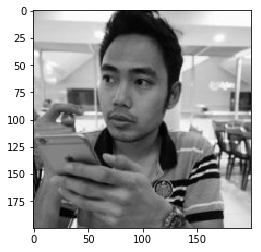

In [23]:
_ = plt.imshow(img_gray)

In [24]:
img = plt.imread('me2.jpg').astype(np.float)

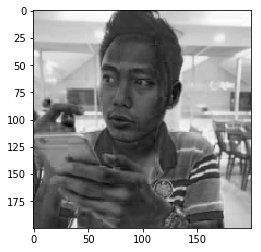

In [25]:
im_gray_sq = np.median(img, axis=2) - (np.max(img, axis=2) - np.min(img, axis=2))
im_gray_sq -= im_gray_sq.min()
im_gray_sq /= im_gray_sq.max()
_ = plt.imshow(im_gray_sq)

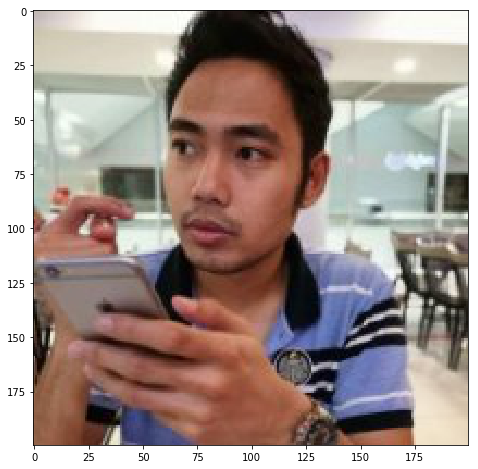

In [26]:
img = plt.imread('me2.jpg').astype(np.float)
fig = plt.figure(figsize=(8,8))
_ = plt.imshow(rgb(img))

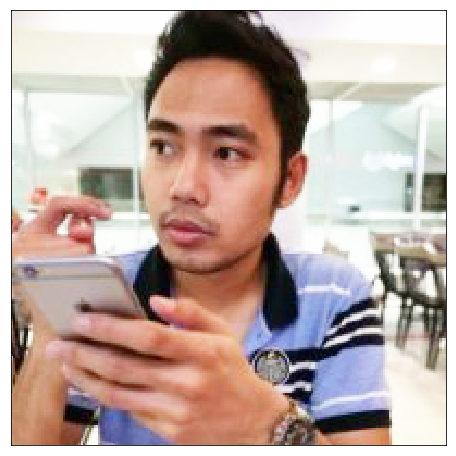

In [27]:
img_filtered = np.copy(img)

img_filtered[:,:,0] -= img_filtered[:,:,0].min()
img_filtered[:,:,0] /= img_filtered[:,:,0].max()
img_filtered[:,:,0] *= 90
img_filtered[:,:,1] -= img_filtered[:,:,1].min()
img_filtered[:,:,1] /= img_filtered[:,:,1].max()
img_filtered[:,:,1] *= 90
img_filtered[:,:,2] -= img_filtered[:,:,2].min()
img_filtered[:,:,2] /= img_filtered[:,:,2].max()
img_filtered[:,:,2] *= 90

img_filtered[:,:,0] = np.sin(np.radians(img_filtered[:,:,0]))
img_filtered[:,:,1] = np.sin(np.radians(img_filtered[:,:,1]))
img_filtered[:,:,2] = np.sin(np.radians(img_filtered[:,:,2]))

fig = plt.figure(figsize=(8,8))
_ = plt.imshow(rgb(img_filtered))
_.axes.get_xaxis().set_visible(False)
_.axes.get_yaxis().set_visible(False)